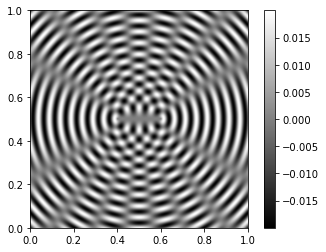

In [1]:
#exercício 1
from math import sqrt,sin,pi
from pylab import imshow,gray,show,colorbar
from numpy import empty
A=0.01
k=2*pi/0.05


s=0.2
l=1
p=500
sp=l/p


x1=l/2 + s/2
y1=l/2
x2=l/2 - s/2
y2=l/2

xi=empty([p,p], float)


for i in range(p):
    y=sp*i
    for j in range(p):
        x=sp*j
        r1=sqrt((x-x1)**2 + (y-y1)**2)
        r2=sqrt((x-x2)**2 + (y-y2)**2)
        xi[i,j] = (A*sin(k*r1)) + (A * sin(k*r2))
        
#Make plot
plot = imshow(xi, origin= "lower", extent=[0,l,0,l])
cb=colorbar(plot)
gray()
show()

#Terminado


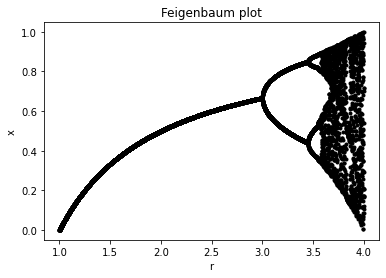

In [3]:
#exercício 2
from numpy import arange, zeros
from pylab import plot, show, xlabel, ylabel, title

n_iterations = 1000
r_values = arange(1, 4, 0.001)
x_array = zeros(r_values.size, float) + 0.5

# iterate to settle down to a fixed point or limit cycle if it's going to
for i in range(0, n_iterations):
    x_array = r_values * x_array * (1 - x_array)

# get one set of branches
for i in range(0, n_iterations + 1):
    x_array = r_values * x_array * (1 - x_array)
plot(r_values, x_array, '.', color="k")

# get another set of branches
for i in range(0, n_iterations + 1):
    x_array = r_values * x_array * (1 - x_array)
plot(r_values, x_array, '.', color="k")

for i in range(0, n_iterations + 1):
    x_array = r_values * x_array * (1 - x_array)
plot(r_values, x_array, '.', color="k")

for i in range(0, n_iterations + 1):
    x_array = r_values * x_array * (1 - x_array)
plot(r_values, x_array, '.', color="k")

plot(r_values, x_array, '.', color="k")
xlabel("r")
ylabel("x")
title("Feigenbaum plot")
show()

o valor de h é 4.206481266891891e-34


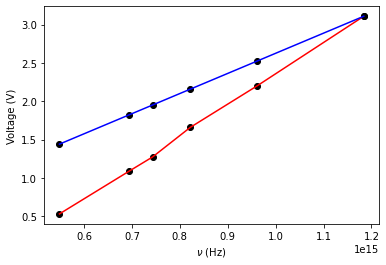

In [1]:
#exercício 3
from numpy import loadtxt, empty
from pylab import plot, show, xlabel, ylabel

data=loadtxt('millikan.txt',float)
f=data[:,0]
V=data[:,1]

N=len(f)

Ef = 0
EV = 0
Eff = 0
EfV = 0

for i in range (N):
    Ef = f[i]
    EV = V[i]
    Eff = f[i]**2
    EfV = f[i]*V[i]
    
    
Ef = 1/N * Ef
EV = 1/N * EV
Eff = 1/N * Eff
EfV = 1/N * EfV



m = (EfV - Ef * EV)/(Eff - Ef**2)
c = (Eff * EV - Ef * EfV)/(Eff - Ef**2)


y = empty(N, float)
for i in range (N):
    y[i] = m * f[i] + c

h=m * 1.602e-19
print("o valor de h é " + str(h))

plot(f, V, 'ko')
plot(f, V, 'red')
plot(f, y, 'ko')
plot(f, y, 'blue')
xlabel(r"$\nu$ (Hz)")
ylabel("Voltage (V)")
show()

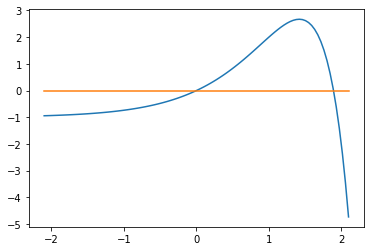

0.0
1.8928404581101859
4.138160448996553e-17
1.8928404581098242


In [4]:
#exercício 4
from numpy import linspace
from pylab import plot, show

def f(x):
    return (4**x - 3**(2*x) + 2**(3*x) -1)


x =linspace(-2.1,2.1, 100)
plot(x,f(x))
plot(x,x*0)
show()

#método de bissecção

def bis(x1,x2):
    if (f(x1) * f(x2) >0):
        print("não deu certo, pois x1 e x2 não tem sinais opostos.")
        return
    while (abs(x2-x1) >= 1E-12):  
        x = (x1+x2)/2
        #não percebo bem esta parte 
        if (f(x) == 0.0): 
            break
        if (f(x)*f(x1) < 0): 
            x2 = x 
        else: 
            x1 = x 
    return x

print(bis(-1,1))

print(bis(1,2))


#método da secante

def sec(x1,x2):
    if (f(x1) * f(x2) >0):
        print("não deu certo, pois x1 e x2 não tem sinais opostos.")
        return
    while (abs(x2-x1) >= 1E-12):
        if f(x2)-f(x1) == 0:
            return x2
        x_temp = x2 - (f(x2)*(x2-x1))/(f(x2)-f(x1))
        x1 = x2
        x2 = x_temp
    return x2

print(sec(-1,1))

print(sec(1,2))

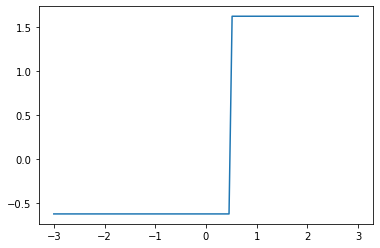

-0.6180339887498949
1.618033988749895


In [13]:
#exercício 5
from numpy import linspace
from pylab import plot, show

accuracy= 1*10**(-12)


def f(x):
    return x**2-x-1
def f_d(x):
    return 2*x-1



def root(start_val):
    x = start_val
    delta = f(x) / f_d(x)
    while abs(delta) > accuracy:
        delta = f(x) / f_d(x)
        x -= delta
    return x

upoints=linspace(-3,3,100)
xpoints= [] 

for u in upoints:
    xpoints.append(root(u))

plot(upoints,xpoints)
show()

print(root(-5))
print(root(4))

In [31]:
#exercício 6
from numpy import loadtxt, zeros, dot
from numpy.linalg import inv
X=loadtxt('matriz 6.txt')
#pela função do numpy
print("Numpy Function")
Y=inv(X)
I=dot(X,Y)
print(X)
print(Y)
print(I)
    #error: não me está a dar totalmente 0, deve ser de outras cenas don't worry.
#função própria (fica para depois)
#print("Própria")
#print(X)
#def inv(x):
#    l=len(x[0])
#    r=len(x)
    
#    return 
#print(inv(X))

Numpy Function
[[8. 2. 5.]
 [7. 3. 1.]
 [4. 9. 6.]]
[[ 0.03585657  0.1314741  -0.05179283]
 [-0.15139442  0.11155378  0.10756972]
 [ 0.20318725 -0.25498008  0.03984064]]
[[ 1.00000000e+00  0.00000000e+00  2.77555756e-17]
 [-2.77555756e-17  1.00000000e+00  3.46944695e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Própria
[[8. 2. 5.]
 [7. 3. 1.]
 [4. 9. 6.]]
None


In [35]:
#exercício 7
from numpy import loadtxt, zeros, dot
from numpy.linalg import inv
X=loadtxt('matriz 7.txt')
print(len(X))

def LU_decomp(A):

    # define list to store swaps from pivoting
    swaps = []
    
    N = len(A)
    # Gaussian Elimination
    for m in range(N):
        # Partial pivoting
        largest = abs(A[m, m])
        largest_row = m
        for i in range(m + 1, N):
            if abs(A[i, m]) > largest:
                largest = A[i, m]
                largest_row = i
        if largest_row != m:
            current = copy(A[m, :]) # need to use copy because A[m, :] is a reference
            A[m, :] = A[largest_row, :]
            A[largest_row, :] = current

        # Divide by the diagonal element
        div = A[m,m]
        A[m, :] /= div

        # Now subtract from the lower rows
        for i in range(m + 1, N):
            mult = A[i, m]
            A[i, :] -= mult * A[m, :]

  
    return A
print(LU_decomp(X))

4
[[ 1.          0.42857143 -0.14285714  0.28571429]
 [ 0.          1.          0.21276596  0.46808511]
 [ 0.          0.          1.         -0.38922156]
 [ 0.          0.          0.          1.        ]]


In [36]:
#exercício 8
from numpy import array, empty, copy, loadtxt
from pylab import plot, show, xlabel, ylabel, linspace
A=loadtxt('matriz 8.txt')
v=loadtxt('vetor 8.txt')
def LU_decomp(A, v):
    # define list to store swaps from pivoting
    swaps = []
    
    N = len(v)
    # Gaussian Elimination
    for m in range(N):
        # Partial pivoting
        largest = abs(A[m, m])
        largest_row = m
        for i in range(m + 1, N):
            if abs(A[i, m]) > largest:
                largest = A[i, m]
                largest_row = i
        if largest_row != m:
            current = copy(A[m, :]) # need to use copy because A[m, :] is a reference
            A[m, :] = A[largest_row, :]
            A[largest_row, :] = current

        # Divide by the diagonal element
        div = A[m,m]
        A[m, :] /= div
        v[m] /= div

        # Now subtract from the lower rows
        for i in range(m + 1, N):
            mult = A[i, m]
            A[i, :] -= mult * A[m, :]
            v[i] -= mult * v[m]

    # Backsubstitution
    x = empty(N, float)
    for m in range(N-1, -1, -1):
        x[m] = v[m]
        for i in range(m+1, N):
            x[m] -= A[m, i] * x[i]

    return x
print(LU_decomp(A, v))


[-1.  4.]
